In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.age.value_counts()

58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

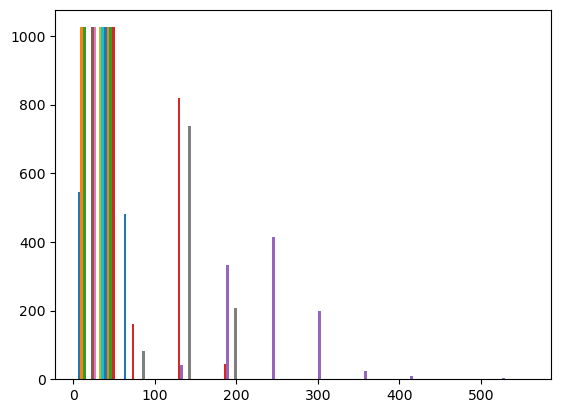

In [11]:
plt.hist(df)
plt.show()

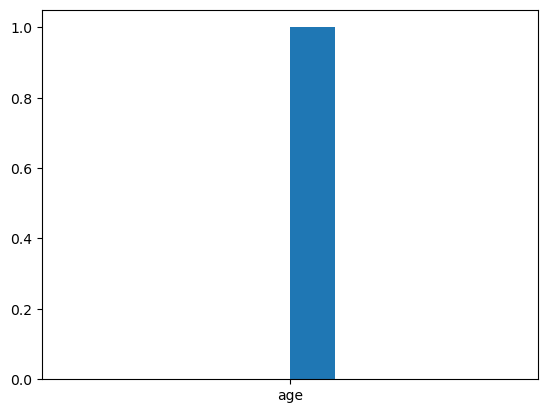

In [13]:
plt.hist(['age'])
plt.show()

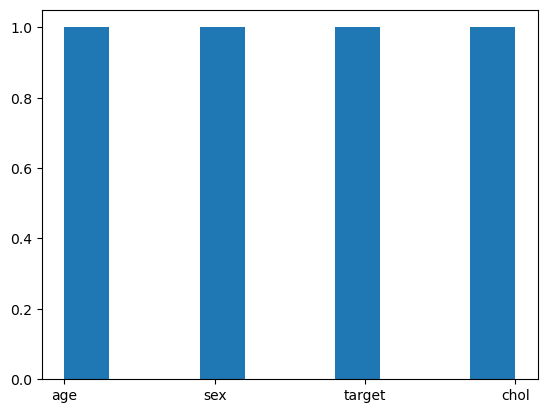

In [17]:
plt.hist([['age','sex','target','chol']])
plt.show()

<AxesSubplot:ylabel='Count'>

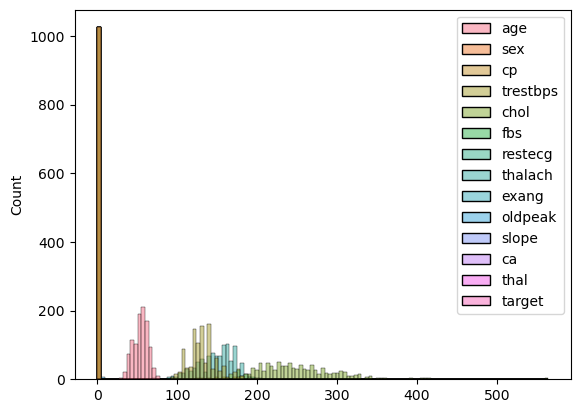

In [18]:
sn.histplot(df)

<AxesSubplot:ylabel='Count'>

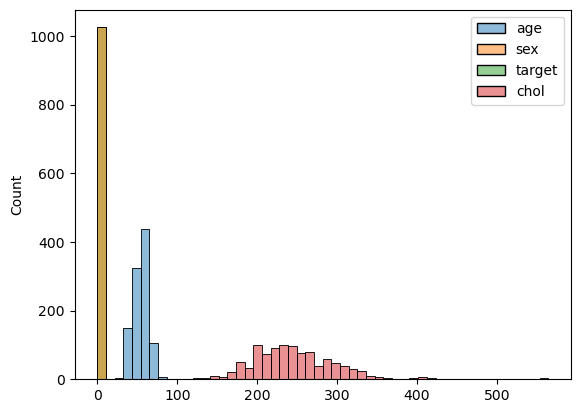

In [20]:
sn.histplot(df[['age','sex','target','chol']])

Text(0.5, 1.0, 'age vs sex')

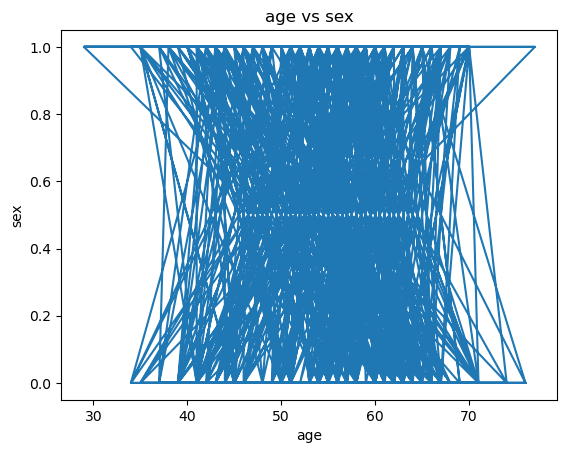

In [25]:
plt.plot(df['age'],df['sex'])
plt.xlabel('age')
plt.ylabel('sex')
plt.title('age vs sex')

Text(0.5, 1.0, 'age vs sex')

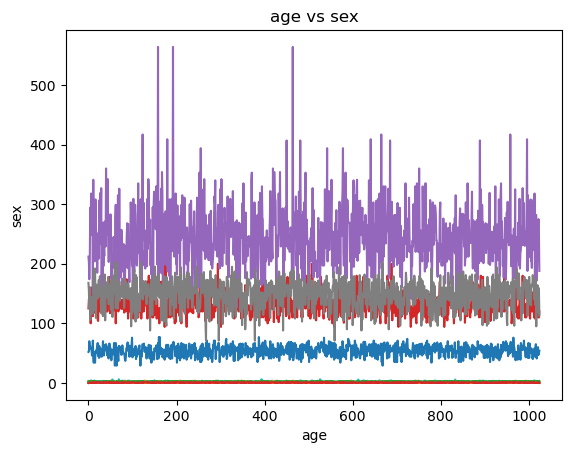

In [26]:
plt.plot(df)
plt.xlabel('age')
plt.ylabel('sex')
plt.title('age vs sex')

<AxesSubplot:xlabel='age', ylabel='sex'>

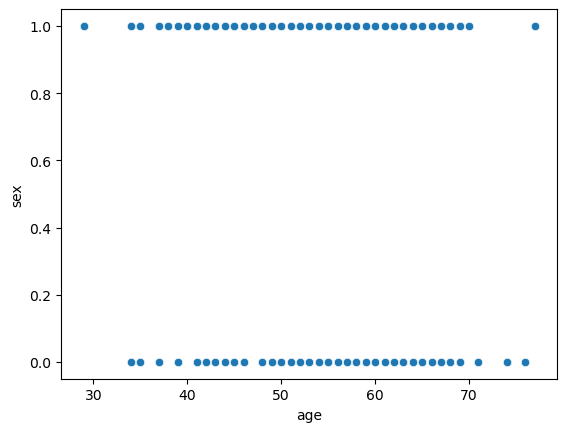

In [28]:
sn.scatterplot(x='age',y='sex',data=df)

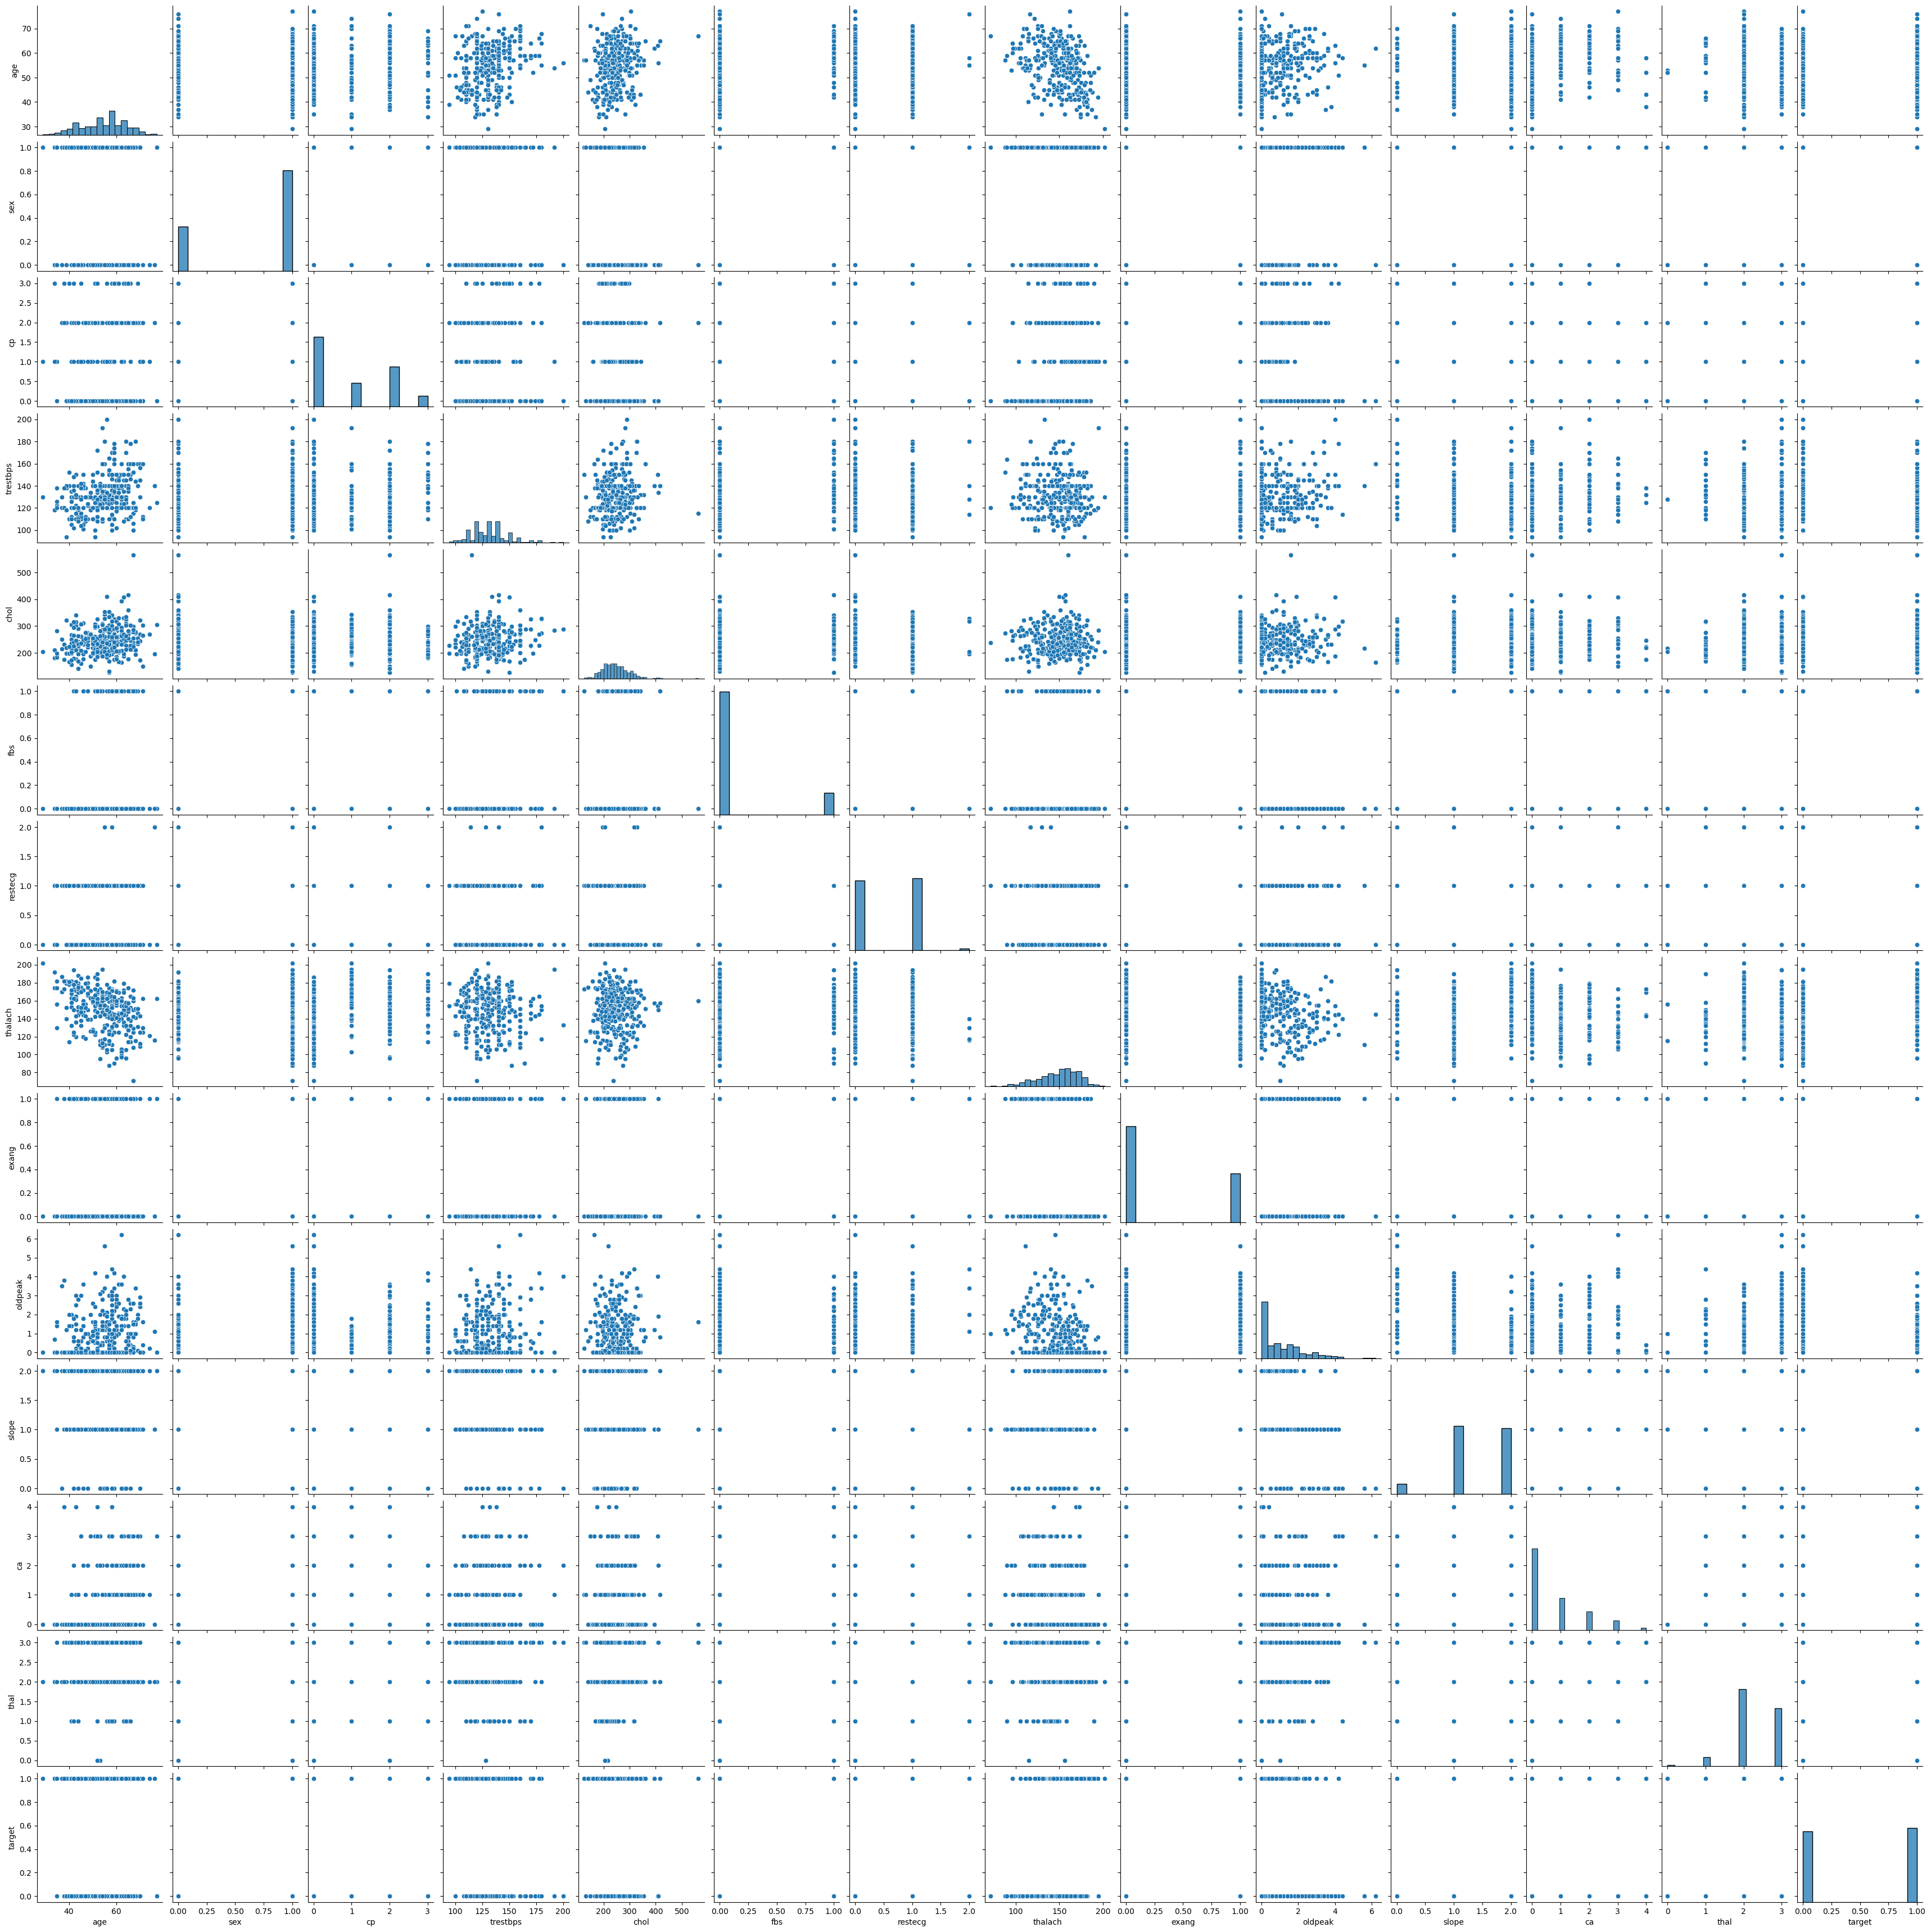

In [29]:
sn.pairplot(df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'boxplot')

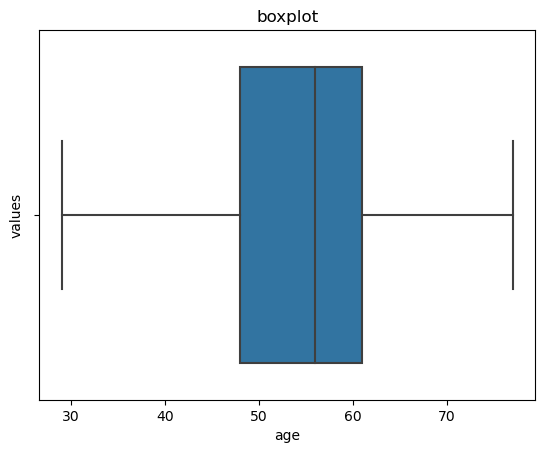

In [32]:
sn.boxplot(df['age'])
plt.xlabel('age')
plt.ylabel('values')
plt.title('boxplot')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [39]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.79


In [43]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
y_pred = clf1.predict(X_test)

In [45]:
# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.99


In [46]:
from sklearn.neighbors import KNeighborsClassifier


In [47]:
clf2 = KNeighborsClassifier(n_neighbors=5)
clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
y_pred = clf2.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy:.2f}')

Accuracy score: 0.73
